### 목표 : 생선 품종 분류 모델
- 데이터 : 2가지 품종의 생선 데이터 fish.csv
- 특성   : Weight, Length
- 타겟   : Species
- 유형   : 지도학습 / 분류 (Classification)

(1) 모듈 준비 & 데이터 준비

In [178]:
import pandas as pd                                     # 데이터 파일 관련 모듈
from sklearn.neighbors import KNeighborsClassifier      # 기계학습 관련 모듈

In [179]:
data_file = '../DATA/fish.csv'
fishDF = pd.read_csv(data_file, usecols=[0, 1, 2])  # 5개 피쳐/특성 중 2개의 피쳐/특성 선택
fishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [180]:
# Bream, Smelt 품종 행만 추출
mask = fishDF.Species.isin(['Bream', 'Smelt'])
twoFishDF = fishDF[mask]
twoFishDF.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158],
      dtype='int64')

In [181]:
# 인덱스 정리
twoFishDF.reset_index(drop=True, inplace=True)
twoFishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


(2) 데이터 전처리

In [182]:
# 'Bream', 'Smelt' 품종명 수치화
# twoFishDF = twoFishDF.replace({'Bream':0, 'Smelt':1}).copy()  # SettingWithCopyWarning 방지
twoFishDF.loc[:, 'Species'] = twoFishDF['Species'].replace({'Bream':0, 'Smelt':1}).copy()
twoFishDF['Species'] = twoFishDF['Species'].astype('int64')
twoFishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     int64  
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


C:\Users\kdp\AppData\Local\Temp\ipykernel_17612\1289898159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoFishDF['Species'] = twoFishDF['Species'].astype('int64')


In [183]:
twoFishDF.head()

,Species,Weight,Length
0,0,242.0,25.4
1,0,290.0,26.3
2,0,340.0,26.5
3,0,363.0,29.0
4,0,430.0,29.0


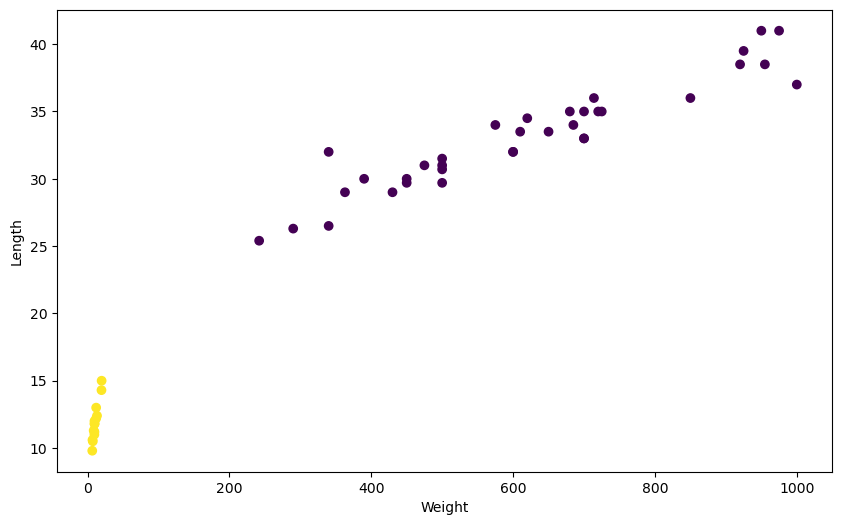

In [184]:
# Weight, Length로 품종 구별이 가능한지 시각화 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(x=twoFishDF.Weight, y=twoFishDF.Length, c=twoFishDF.Species)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

(3) 기계학습을 위한 데이터 준비
- 학습용 데이터셋       : 80%
- 테스트용 데이터셋     : 20%
- 피쳐/특성 + 타겟/라벨/클래스

In [185]:
# 데이터 섞기 => 100% 모두 섞기
twoFishDF = twoFishDF.sample(frac=1.0)

In [186]:
# 학습과 테스트 비율 조절 개수 계산
num = round(twoFishDF.shape[0] * 0.8)

# 학습 데이터셋 추출
twoFishDF.iloc[:num+1]
print(f'')

testDF = twoFishDF.iloc[num+1:]

In [187]:
twoFishDF

,Species,Weight,Length
9,0,500.0,30.7
45,1,13.4,12.4
6,0,500.0,29.7
47,1,19.7,14.3
14,0,600.0,32.0
22,0,620.0,34.5
2,0,340.0,26.5
23,0,680.0,35.0
34,0,950.0,41.0
25,0,725.0,35.0


(3-2) scikit-learn 모듈 활용한 학습 & 테스트용 데이터셋 준비
- 추가 모듈 로딩

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
# 특성과 타겟 분리
featureDF = twoFishDF[twoFishDF.columns[1:]]
targetSR = twoFishDF.Species

print(f'featureDF => {featureDF.shape}\n{featureDF.head(2)}')
print(f'targetSR => {targetSR.shape}\n{targetSR.head(2)}')

featureDF => (49, 2)
    Weight  Length
9    500.0    30.7
45    13.4    12.4
targetSR => (49,)
9     0
45    1
Name: Species, dtype: int64


In [190]:
## -- 비율 설정 없이 학습/테스트셋 분리
## -- [기본] shuffle=True, 
## -- [설정] train:test = 0.8:0.2 => test_size 또는 train_size 매개변수 값 설정
## -- [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2)

In [191]:
print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
#print(x_train.head(2), y_train.head(2), sep='\n', end='\n\n')

print(f'x_test : {x_test.shape}, y_test : {y_test.shape}')
#print(x_test.head(2), y_test.head(2), sep='\n', end='\n\n')

# 타겟/클래스 비율
print(y_train.value_counts()/y_train.shape[0])
print(y_test.value_counts()/y_test.shape[0])

x_train : (39, 2), y_train : (39,)
x_test : (10, 2), y_test : (10,)
Species
0    0.717949
1    0.282051
Name: count, dtype: float64
Species
0    0.7
1    0.3
Name: count, dtype: float64


In [192]:
## -- 비율 설정 없이 학습/테스트셋 분리
## -- [기본] shuffle=True, 
## -- [설정] train:test = 0.8:0.2 => test_size 또는 train_size 매개변수 값 설정
##           분류의 경우, target이 불균형일 경우 비율 지정하는 stratify 매개변수를 target으로 설정 ('Species' 컬럼)
## -- [반환] 학습용 피쳐, 테스트용 피쳐, 학습용 타겟, 테스트용 타겟
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2, stratify=targetSR)

In [193]:
print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
print(x_train.head(2), y_train.head(2), sep='\n', end='\n\n')

print(f'x_test : {x_test.shape}, y_test : {y_test.shape}')
print(x_test.head(2), y_test.head(2), sep='\n', end='\n\n')

x_train : (39, 2), y_train : (39,)
    Weight  Length
44    12.2    12.2
33   975.0    41.0
44    1
33    0
Name: Species, dtype: int64

x_test : (10, 2), y_test : (10,)
    Weight  Length
43     9.8    12.0
25   725.0    35.0
43    1
25    0
Name: Species, dtype: int64



In [194]:
### 검증용 데이터셋 준비 -> 학습용 데이터셋에서 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size=0.2, stratify=y_train)

In [195]:
print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
#print(x_train.head(2), y_train.head(2), sep='\n', end='\n\n')

print(f'x_val : {x_val.shape}, y_train : {y_val.shape}')
#print(x_val.head(2), y_val.head(2), sep='\n', end='\n\n')

print(f'x_test : {x_test.shape}, y_test : {y_test.shape}')
#print(x_test.head(2), y_test.head(2), sep='\n', end='\n\n')

x_train : (31, 2), y_train : (31,)
x_val : (8, 2), y_train : (8,)
x_test : (10, 2), y_test : (10,)


(4) 학습 진행
- 학습 방법 : 지도학습 / 분류 => KNN
- 모델 인스턴스 생성 => fit() 메서드

In [196]:
# 모델 인스턴스 생성
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [197]:
len(x_train), len(y_train)

(31, 31)

In [198]:
# 학습 진행 => 학습용 데이터로 학습 진행
model.fit(x_train, y_train)

KNeighborsClassifier()

(5) 테스트 진행 => 학습에 사용되지 않는 데이터로 진행

In [199]:
model.score(x_val, y_val)

1.0

(6) 모델 활용/예측 => 새로운 데이터로 진행

In [200]:
model.predict(x_test)

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [201]:
# model.score(x_test, y_test)
y_test == model.predict(x_test)

43    True
25    True
23    True
37    True
29    True
28    True
19    True
0     True
45    True
10    True
Name: Species, dtype: bool

# (6-1) 사용자로부터 전달받은 새로운 데이터에 대한 예측
=> 학습할 때 전달되는 피쳐형태와 동일한 데이터

In [202]:
## 길이 25, 무게 160인 생선의 품종 예측
new_data = pd.DataFrame([[160, 25]], columns=twoFishDF.columns[1:])
new_data

,Weight,Length
0,160,25


In [208]:
x_train

,Weight,Length
27,714.0,36.0
40,8.7,11.3
21,685.0,34.0
5,450.0,29.7
30,920.0,38.5
15,600.0,32.0
34,950.0,41.0
1,290.0,26.3
31,955.0,38.5
48,19.9,15.0


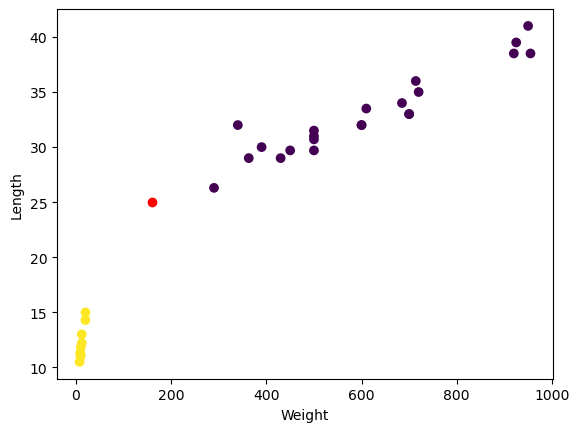

In [217]:
# 새로운 데이터와 학습 데이터의 시각화
plt.plot(new_data.Weight, new_data.Length, 'ro')

# 학습 데이터 시각화
plt.scatter(x_train.Weight, x_train.Length, c=y_train)
plt.xlabel('Weight')
plt.ylabel('Length')
# plt.ylim(0, 1000)
plt.show()

In [204]:
# 결과 : 'Smelt' (왜? Length의 범위는 0 ~ 45 인데 반해, Weight의 범위는 0 ~ 1000 이기 때문에 Weight값에 거리가 좌지우지되기 때문)
model.predict(new_data)

array([1], dtype=int64)

In [205]:
# 새로운 데이터의 최근접 데이터 추출
_, index = model.kneighbors(new_data)

index.tolist()[0]

[7, 9, 14, 17, 23]

In [206]:
twoFishDF.iloc[index.tolist()[0]]

,Species,Weight,Length
23,0,680.0,35.0
25,0,725.0,35.0
39,1,9.8,11.2
5,0,450.0,29.7
42,1,9.9,11.8


numpy.ndarray